###  Практическоe заданиe 5

### Библиотеки

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


1. Определить тип данных для каждого столбца.


In [11]:
PATH = 'E:/data-analytics/lab5/'
data = pd.read_excel(PATH + "05_Зачисление.xls")
print(data.columns)
print("Ординальные качественные данные: 'Serial No.'")
print("Oрдинальные данные: 'University Rating'")
print("Дискретные количественные данные: 'GRE Score', 'TOEFL Score'")
print("Дихотомические качественные данные: 'Research'")
print("Непрерывные количественные данные: 'SOP', 'LOR ', 'CGPA', 'Chance of Admit '")

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
Ординальные качественные данные: 'Serial No.'
Oрдинальные данные: 'University Rating'
Дискретные количественные данные: 'GRE Score', 'TOEFL Score'
Дихотомические качественные данные: 'Research'
Непрерывные количественные данные: 'SOP', 'LOR ', 'CGPA', 'Chance of Admit '


 2. Построить диаграммы рассеивания для пар данных:
GRE – Chance of Admit, TOEFL – Chance of Admit,
University Rating – Chance of Admit, SOP – Chance of Admit,
LOR – Chance of Admit, CGPA – Chance of Admit.
Привести визуальную оценку зависимости шанса поступления от
указанных величин.



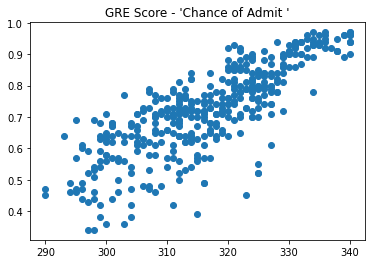

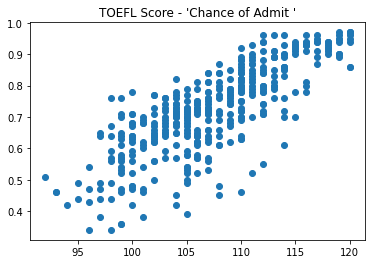

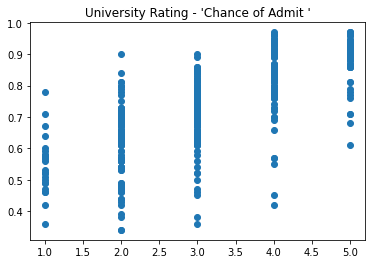

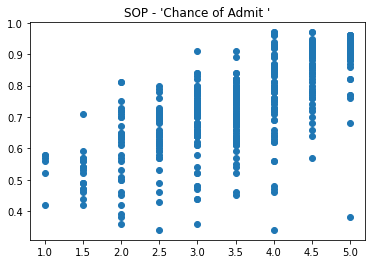

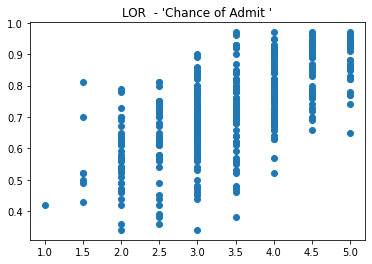

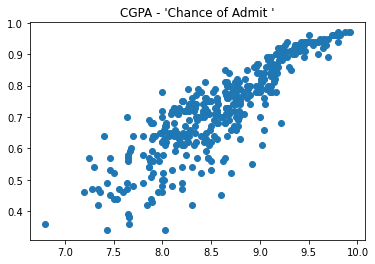

In [12]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
for col in cols:
 plt.scatter(data[col], data['Chance of Admit '])
 plt.title(col + " - 'Chance of Admit '")
 plt.show()


3. Построить модель регрессии (простой линейной /
множественной линейной / полиномиальной по независимым
переменным), которая даст наилучший прогноз шанса поступления
абитуриента. В качестве независимых переменных может
выбираться любое количество величин из пункта 2.
Выбрать оптимальную и обосновать оптимальность
построенной модели с помощью разобранных метрик (R2, MSE, RSS

In [13]:
x = data[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = data['Chance of Admit ']
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=0)
# simple linear regression
lin_model = LinearRegression()
# print(train_x['GRE Score'])
X = np.reshape(train_x['GRE Score'].values, (-1, 1))
lin_model.fit(X, train_y)
VAL_X = np.reshape(val_x['GRE Score'].values, (-1, 1))
y_pred = lin_model.predict(VAL_X)
print("Простая линейная регрессия('GRE Score'): ")
print("R2: ", r2_score(val_y, y_pred))
print("MSE: ", mean_squared_error(val_y, y_pred))
print("RSS: ", ((val_y - y_pred)**2).sum())
# multiple linear regression
lin_model = LinearRegression()
lin_model.fit(train_x, train_y)
y_pred = lin_model.predict(val_x)
print("Множественная линейная регрессия: ")
print("R2: ", r2_score(val_y, y_pred))
print("MSE: ", mean_squared_error(val_y, y_pred))
print("RSS: ", ((val_y - y_pred)**2).sum())
def polynomial_regression(degree):
 poly_feat = PolynomialFeatures(degree=degree, include_bias=False)
 poly_train_x = poly_feat.fit_transform(train_x)
 poly_model = LinearRegression()
 poly_model.fit(poly_train_x, train_y)
 y_pr = poly_model.predict(poly_feat.fit_transform(val_x))
 print("Множественная полиномиальная регрессия (степень = ", degree, ") : ")
 print("R2: ", r2_score(val_y, y_pr))
 print("MSE: ", mean_squared_error(val_y, y_pr))
 print("RSS: ", ((val_y - y_pr) ** 2).sum())
polynomial_regression(degree=2)
polynomial_regression(degree=3)

Простая линейная регрессия('GRE Score'): 
R2:  0.5456668070172048
MSE:  0.008254091184558793
RSS:  0.6603272947647034
Множественная линейная регрессия: 
R2:  0.7594824470194684
MSE:  0.004369598885687042
RSS:  0.34956791085496336
Множественная полиномиальная регрессия (степень =  2 ) : 
R2:  0.7380639942518405
MSE:  0.0047587182916795975
RSS:  0.38069746333436777
Множественная полиномиальная регрессия (степень =  3 ) : 
R2:  0.1619565452693963
MSE:  0.015225141369389263
RSS:  1.2180113095511411


---------------------